<a href="https://colab.research.google.com/github/spindouken/holbertonschool-machine_learning/blob/master/supervised_learning/qa_bot/transformerApps%26qaBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***transformer_apps***

#### ***task 0***

In [ ]:
#!/usr/bin/env python3
"""
Create the class Dataset that loads and preps a dataset for machine translation using tensorflow_datasets
"""
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


class Dataset:
    """
    loads and preps a dataset for machine translation
    """

    def __init__(self):
        """
        class constructor

        contains the instance attributes:
        data_train, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset train split, loaded as_supervided
        data_valid, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset validate split, loaded as_supervided
        tokenizer_pt is the Portuguese tokenizer
            created from the training set
        tokenizer_en is the English tokenizer
            created from the training set

        what is a tf.data.Dataset?
        A tf.data.Dataset is a sequence of elements that can be processed in a streaming fashion.
        The elements of a dataset are tensors.

        what is a streaming fashion?
        A streaming fashion is a way of processing data one element at a time.

        how does tfds work?
        tfds works by downloading the dataset to disk and then loading it into memory.
        The first time you use a dataset, it is downloaded to your disk.
        The next time it is used, it is loaded from disk.

        what are some commands when working with tfds?
        tfds.list_builders() - lists all datasets
        tfds.load() - loads a dataset
        tfds.as_numpy() - converts a tf.data.Dataset into an iterable that yields NumPy arrays
        tfds.as_supervised() - loads a dataset in supervised mode
        """
        dataset, metadata = tfds.load(
            "ted_hrlr_translate/pt_to_en", with_info=True, as_supervised=True
        )
        self.metadata = metadata
        self.data_train = dataset["train"]
        self.data_valid = dataset["validation"]
        self.tokenizer_pt, self.tokenizer_en = self.tokenize_dataset(self.data_train)

    def tokenize_dataset(self, data):
        """
        creates sub-word tokenizers for our dataset

        data is a tf.data.Dataset whose examples are formatted as a tuple (pt, en)
            pt is the tf.Tensor containing the Portuguese sentence
            en is the tf.Tensor containing the corresponding English sentence
        The maximum vocab size should be set to 2**15

        Returns: tokenizer_pt, tokenizer_en
            tokenizer_pt is the Portuguese tokenizer
            tokenizer_en is the English tokenizer
        """
        tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (pt.numpy() for pt, en in data), target_vocab_size=2**15
        )
        tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (en.numpy() for pt, en in data), target_vocab_size=2**15
        )
        return tokenizer_pt, tokenizer_en


In [ ]:
import tensorflow as tf

data = Dataset()
for pt, en in data.data_train.take(1):
    print(pt.numpy().decode("utf-8"))
    print(en.numpy().decode("utf-8"))
for pt, en in data.data_valid.take(1):
    print(pt.numpy().decode("utf-8"))
    print(en.numpy().decode("utf-8"))
print(type(data.tokenizer_pt))
print(type(data.tokenizer_en))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete0PFVFA/ted_hrlr_translate-trai…

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete0PFVFA/ted_hrlr_translate-vali…

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete0PFVFA/ted_hrlr_translate-test…

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.
e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
tinham comido peixe com batatas fritas ?
did they eat fish and chips ?
<class 'tensorflow_datasets.core.deprecated.text.subword_text_encoder.SubwordTextEncoder'>
<class 'tensorflow_datasets.core.deprecated.text.subword_text_encoder.SubwordTextEncoder'>


#### ***task 1***

In [ ]:
#!/usr/bin/env python3
"""
update the class Dataset that loads and preps a dataset for machine translation
"""
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


class Dataset:
    """
    loads and preps a dataset for machine translation
    """

    def __init__(self):
        """
        class constructor

        contains the instance attributes:
        data_train, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset train split, loaded as_supervided
        data_valid, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset validate split, loaded as_supervided
        tokenizer_pt is the Portuguese tokenizer
            created from the training set
        tokenizer_en is the English tokenizer
            created from the training set
        """
        dataset, metadata = tfds.load(
            "ted_hrlr_translate/pt_to_en", with_info=True, as_supervised=True
        )
        self.metadata = metadata
        self.data_train = dataset["train"]
        self.data_valid = dataset["validation"]
        self.tokenizer_pt, self.tokenizer_en = self.tokenize_dataset(self.data_train)

    def tokenize_dataset(self, data):
        """
        creates sub-word tokenizers for our dataset

        data is a tf.data.Dataset whose examples are formatted as a tuple (pt, en)
            pt is the tf.Tensor containing the Portuguese sentence
            en is the tf.Tensor containing the corresponding English sentence
        The maximum vocab size should be set to 2**15

        Returns: tokenizer_pt, tokenizer_en
            tokenizer_pt is the Portuguese tokenizer
            tokenizer_en is the English tokenizer
        """
        tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (pt.numpy() for pt, en in data), target_vocab_size=2**15
        )
        tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (en.numpy() for pt, en in data), target_vocab_size=2**15
        )
        return tokenizer_pt, tokenizer_en

    def encode(self, pt, en):
        """
        encodes a translation into tokens

        pt is the tf.Tensor containing the Portuguese sentence
        en is the tf.Tensor containing the corresponding English sentence
        the tokenized sentences should include the start and end of sentence tokens
        the start token should be indexed as vocab_size
        the end token should be indexed as vocab_size + 1

        Returns: pt_tokens, en_tokens
            pt_tokens is a np.ndarray containing the Portuguese tokens
            en_tokens is a np.ndarray. containing the English tokens
        """
        pt_tokens = (
            [self.tokenizer_pt.vocab_size]
            + self.tokenizer_pt.encode(pt.numpy())
            + [self.tokenizer_pt.vocab_size + 1]
        )
        en_tokens = (
            [self.tokenizer_en.vocab_size]
            + self.tokenizer_en.encode(en.numpy())
            + [self.tokenizer_en.vocab_size + 1]
        )
        return pt_tokens, en_tokens


In [ ]:
data = Dataset()
for pt, en in data.data_train.take(1):
    print(data.encode(pt, en))
for pt, en in data.data_valid.take(1):
    print(data.encode(pt, en))


([30138, 6, 36, 17925, 13, 3, 3037, 1, 4880, 3, 387, 2832, 18, 18444, 1, 5, 8, 3, 16679, 19460, 739, 2, 30139], [28543, 4, 56, 15, 1266, 20397, 10721, 1, 15, 100, 125, 352, 3, 45, 3066, 6, 8004, 1, 88, 13, 14859, 2, 28544])
([30138, 289, 15409, 2591, 19, 20318, 26024, 29997, 28, 30139], [28543, 93, 25, 907, 1366, 4, 5742, 33, 28544])


#### ***task 2***

In [ ]:
"""
update the class Dataset that loads and preps a dataset for machine translation
"""
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


class Dataset:
    """
    loads and preps a dataset for machine translation
    """

    def __init__(self):
        """
        class constructor

        contains the instance attributes:
        data_train, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset train split, loaded as_supervided
        data_valid, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset validate split, loaded as_supervided
        tokenizer_pt is the Portuguese tokenizer
            created from the training set
        tokenizer_en is the English tokenizer
            created from the training set
        """
        dataset, metadata = tfds.load(
            "ted_hrlr_translate/pt_to_en", with_info=True, as_supervised=True
        )
        self.metadata = metadata
        self.data_train = dataset["train"]
        self.data_valid = dataset["validation"]
        self.tokenizer_pt, self.tokenizer_en = self.tokenize_dataset(self.data_train)

        # apply tf_encode to the training and validation datasets
        self.data_train = self.data_train.map(
            lambda pt, en: self.tf_encode(pt, en),
            num_parallel_calls=tf.data.experimental.AUTOTUNE,
        )
        self.data_valid = self.data_valid.map(
            lambda pt, en: self.tf_encode(pt, en),
            num_parallel_calls=tf.data.experimental.AUTOTUNE,
        )

    def tokenize_dataset(self, data):
        """
        creates sub-word tokenizers for our dataset

        data is a tf.data.Dataset whose examples are formatted as a tuple (pt, en)
            pt is the tf.Tensor containing the Portuguese sentence
            en is the tf.Tensor containing the corresponding English sentence
        The maximum vocab size should be set to 2**15

        Returns: tokenizer_pt, tokenizer_en
            tokenizer_pt is the Portuguese tokenizer
            tokenizer_en is the English tokenizer
        """
        tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (pt.numpy() for pt, en in data), target_vocab_size=2**15
        )
        tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (en.numpy() for pt, en in data), target_vocab_size=2**15
        )
        return tokenizer_pt, tokenizer_en

    def encode(self, pt, en):
        """
        encodes a translation into tokens
        pt is the tf.Tensor containing the Portuguese sentence
        en is the tf.Tensor containing the corresponding English sentence
        the tokenized sentences should include the start and end of sentence tokens
        the start token should be indexed as vocab_size
        the end token should be indexed as vocab_size + 1
        Returns: pt_tokens, en_tokens
            pt_tokens is a np.ndarray containing the Portuguese tokens
            en_tokens is a np.ndarray. containing the English tokens
        """
        pt_tokens = (
            [self.tokenizer_pt.vocab_size]
            + self.tokenizer_pt.encode(pt.numpy())
            + [self.tokenizer_pt.vocab_size + 1]
        )
        en_tokens = (
            [self.tokenizer_en.vocab_size]
            + self.tokenizer_en.encode(en.numpy())
            + [self.tokenizer_en.vocab_size + 1]
        )
        return pt_tokens, en_tokens

    def tf_encode(self, pt, en):
        """
        acts as a tensorflow wrapper for the encode instance method
        """
        result_pt, result_en = tf.py_function(
            self.encode, [pt, en], [tf.int64, tf.int64]
        )
        result_pt.set_shape([None])
        result_en.set_shape([None])
        return result_pt, result_en


In [ ]:
data = Dataset()
print("got here")
for pt, en in data.data_train.take(1):
    print(pt, en)
for pt, en in data.data_valid.take(1):
    print(pt, en)


got here
tf.Tensor(
[30138     6    36 17925    13     3  3037     1  4880     3   387  2832
    18 18444     1     5     8     3 16679 19460   739     2 30139], shape=(23,), dtype=int64) tf.Tensor(
[28543     4    56    15  1266 20397 10721     1    15   100   125   352
     3    45  3066     6  8004     1    88    13 14859     2 28544], shape=(23,), dtype=int64)
tf.Tensor([30138   289 15409  2591    19 20318 26024 29997    28 30139], shape=(10,), dtype=int64) tf.Tensor([28543    93    25   907  1366     4  5742    33 28544], shape=(9,), dtype=int64)


#### ***task 3***

In [ ]:
#!/usr/bin/env python3
"""
update the class Dataset that loads and preps a dataset for machine translation
"""
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


class Dataset:
    """
    loads and preps a dataset for machine translation
    """

    def __init__(self, batch_size, max_len):
        """
        class constructor

        contains the instance attributes:
        data_train, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset train split, loaded as_supervided
        data_valid, which contains the ted_hrlr_translate/pt_to_en
            tf.data.Dataset validate split, loaded as_supervided
        tokenizer_pt is the Portuguese tokenizer
            created from the training set
        tokenizer_en is the English tokenizer
            created from the training set
        """
        # load dataset
        dataset, metadata = tfds.load(
            "ted_hrlr_translate/pt_to_en", with_info=True, as_supervised=True
        )
        self.metadata = metadata
        self.data_train = dataset["train"]
        self.data_valid = dataset["validation"]

        # tokenization
        self.tokenizer_pt, self.tokenizer_en = self.tokenize_dataset(self.data_train)

        # data pipeline for training data
        self.data_train = self.data_train.map(self.tf_encode)
        # filter out all examples that have either sentence with more than max_len tokens
        self.data_train = self.data_train.filter(
            lambda pt, en: tf.logical_and(
                tf.size(pt) <= max_len, tf.size(en) <= max_len
            )
        )
        # cache the dataset to increase performance
        self.data_train = self.data_train.cache()

        # shuffle the dataset
        self.data_train = self.data_train.shuffle(metadata.splits["train"].num_examples)

        # split dataset into padded batches at size of arg: batch_size
        self.data_train = self.data_train.padded_batch(
            batch_size, padded_shapes=([None], [None])
        )
        # prefetch the dataset using experimental.AUTOTUNE to increase performance
        self.data_train = self.data_train.prefetch(tf.data.experimental.AUTOTUNE)

        # data pipeline for validation data
        self.data_valid = self.data_valid.map(self.tf_encode)
        self.data_valid = self.data_valid.filter(
            lambda pt, en: tf.logical_and(
                tf.size(pt) <= max_len, tf.size(en) <= max_len
            )
        )
        # split validation dataset into batches at size of arg: batch_size
        self.data_valid = self.data_valid.padded_batch(
            batch_size, padded_shapes=([None], [None])
        )

    def tokenize_dataset(self, data):
        """
        creates sub-word tokenizers for our dataset

        data is a tf.data.Dataset whose examples are formatted as a tuple (pt, en)
            pt is the tf.Tensor containing the Portuguese sentence
            en is the tf.Tensor containing the corresponding English sentence
        The maximum vocab size should be set to 2**15

        Returns: tokenizer_pt, tokenizer_en
            tokenizer_pt is the Portuguese tokenizer
            tokenizer_en is the English tokenizer
        """
        tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (pt.numpy() for pt, en in data), target_vocab_size=2**15
        )
        tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
            (en.numpy() for pt, en in data), target_vocab_size=2**15
        )
        return tokenizer_pt, tokenizer_en

    def encode(self, pt, en):
        """
        encodes a translation into tokens
        pt is the tf.Tensor containing the Portuguese sentence
        en is the tf.Tensor containing the corresponding English sentence
        the tokenized sentences should include the start and end of sentence tokens
        the start token should be indexed as vocab_size
        the end token should be indexed as vocab_size + 1
        Returns: pt_tokens, en_tokens
            pt_tokens is a np.ndarray containing the Portuguese tokens
            en_tokens is a np.ndarray. containing the English tokens
        """
        pt_tokens = (
            [self.tokenizer_pt.vocab_size]
            + self.tokenizer_pt.encode(pt.numpy())
            + [self.tokenizer_pt.vocab_size + 1]
        )
        en_tokens = (
            [self.tokenizer_en.vocab_size]
            + self.tokenizer_en.encode(en.numpy())
            + [self.tokenizer_en.vocab_size + 1]
        )
        return pt_tokens, en_tokens

    def tf_encode(self, pt, en):
        """
        acts as a tensorflow wrapper for the encode instance method
        """
        result_pt, result_en = tf.py_function(
            self.encode, [pt, en], [tf.int64, tf.int64]
        )
        result_pt.set_shape([None])
        result_en.set_shape([None])
        return result_pt, result_en

In [ ]:
tf.compat.v1.set_random_seed(0)
data = Dataset(32, 40)
for pt, en in data.data_train.take(1):
    print(pt, en)
for pt, en in data.data_valid.take(1):
    print(pt, en)


tf.Tensor(
[[30138  1029   104 ...     0     0     0]
 [30138    40     8 ...     0     0     0]
 [30138    12    14 ...     0     0     0]
 ...
 [30138    72 23483 ...     0     0     0]
 [30138  2381   420 ...     0     0     0]
 [30138     7 14093 ...     0     0     0]], shape=(32, 39), dtype=int64) tf.Tensor(
[[28543   831   142 ...     0     0     0]
 [28543    16    13 ...     0     0     0]
 [28543    19     8 ...     0     0     0]
 ...
 [28543    18    27 ...     0     0     0]
 [28543  2648   114 ... 28544     0     0]
 [28543  9100 19214 ...     0     0     0]], shape=(32, 37), dtype=int64)
tf.Tensor(
[[30138   289 15409 ...     0     0     0]
 [30138    86   168 ...     0     0     0]
 [30138  5036     9 ...     0     0     0]
 ...
 [30138  1157 29927 ...     0     0     0]
 [30138    33   837 ...     0     0     0]
 [30138   126  3308 ...     0     0     0]], shape=(32, 32), dtype=int64) tf.Tensor(
[[28543    93    25 ...     0     0     0]
 [28543    11    20 ...     0  

#### ***task 4***

In [ ]:
#!/usr/bin/env python3
"""
creates all masks for training/validation
"""
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


def create_masks(inputs, target):
    """
    creates all masks for training/validation

    inputs is a tf.Tensor of shape (batch_size, seq_len_in) that contains
        the input sentence
    target is a tf.Tensor of shape (batch_size, seq_len_out) that contains
        the target sentence

    Returns: encoder_mask, combined_mask, decoder_mask
        encoder_mask is the tf.Tensor padding mask of shape
            (batch_size, 1, 1, seq_len_in) to be applied in the encoder
        combined_mask is the tf.Tensor of shape
            (batch_size, 1, seq_len_out, seq_len_out) used in the 1st
                attention block in the decoder to pad and mask future tokens
                in the input received by the decoder. It takes the maximum
                between a lookahead mask and the decoder target padding mask.
        decoder_mask is the tf.Tensor padding mask of shape
            (batch_size, 1, 1, seq_len_in) used in the 2nd attention block
                in the decoder.
    """
    # get the batch size and sequence lengths from the input and target tensors
    batch_size, seq_len_out = target.shape
    batch_size, seq_len_in = inputs.shape

    # create tf.Tensor encoder padding mask
    encoder_mask = tf.cast(tf.math.equal(inputs, 0), tf.float32)
    # expand dimensions to add the padding to the attention logits
    encoder_mask = encoder_mask[:, tf.newaxis, tf.newaxis, :]   # (batch_size, 1, 1, seq_len_in)

    # create decoder tf.Tensor decoder padding mask (similar to encoder mask)
    #   used in the second attention block (encoder-decoder attention)
    decoder_mask = tf.cast(tf.math.equal(inputs, 0), tf.float32)
    decoder_mask = decoder_mask[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len_in)

    # create look-ahead mask to prevent the model from seeing future tokens
    #   look-ahead mask and decoder target padding mask for the first attention block (self-attention)
    lookAheadMask = 1 - tf.linalg.band_part(
        tf.ones((seq_len_out, seq_len_out)), -1, 0
    )

    # create decoder target padding mask
    # Identify padding tokens in target and expand dimensions
    decoderTargetPaddingMask = tf.cast(tf.math.equal(target, 0), tf.float32)
    decoderTargetPaddingMask = decoderTargetPaddingMask[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len_out)

    # create combined mask for the first attention block in the decoder
    #   combines the look-ahead mask and the decoder target padding mask
    combined_mask = tf.maximum(decoderTargetPaddingMask, lookAheadMask)  # (batch_size, 1, seq_len_out, seq_len_out)
    return encoder_mask, combined_mask, decoder_mask


In [ ]:
tf.compat.v1.set_random_seed(0)
data = Dataset(32, 40)
for inputs, target in data.data_train.take(1):
    print(create_masks(inputs, target))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteGAR2VO/ted_hrlr_translate-trai…

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteGAR2VO/ted_hrlr_translate-vali…

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteGAR2VO/ted_hrlr_translate-test…

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.
(<tf.Tensor: shape=(32, 1, 1, 39), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 0., 0., ..., 1., 1., 1.]]],


       ...,


       [[[0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 0., 0., ..., 1., 1., 1.]]]], dtype=float32)>, <tf.Tensor: shape=(32, 1, 37, 37), dtype=float32, numpy=
array([[[[0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
      

## ***qa_bot***

#### **task 0**

In [ ]:
#!/usr/bin/env python3
"""
finds a snippet of text within a reference document to answer a question
"""
import tensorflow as tf
import tensorflow_hub
from transformers import BertTokenizer


def question_answer(question, reference):
    """
    finds a snippet of text within a reference document to answer a question

    question is a string containing the question to answer
    reference is a string containing the reference document from which to find
        the answer

    utilizes the bert-uncased-tf2-qa model from the tensorflow-hub library
    uses the pretrained BertTokenizer, bert-large-uncased-whole-word-masking-finetuned-squad,
      from the transformers library

    BERT models don't understand text directly; they understand numeric representations.
      Each token is mapped to a unique numeric ID.
    BERT uses special tokens to understand the structure of the input.
      [CLS]: Classifier token (beginning of sentence)
      [SEP]: Separator token (end of each input)

    Returns: a string containing the answer
    If no answer is found, return None
    If multiple answers are found, return the first one
    """
    # initialize a pre-trained BertTokenizer object for tokenizing the input question and reference
    #   into a format suitable for the BERT model
    tokenizer = BertTokenizer.from_pretrained(
        'bert-large-uncased-whole-word-masking-finetuned-squad')

    # initialize the bert-uncased-tf2-qa model from the tensorflow-hub library
    model = tensorflow_hub.load("https://tfhub.dev/see--/bert-uncased-tf2-qa/1")

    # tokenize the question
    questionTokenized = tokenizer.tokenize(question)
    # tokenize the reference
    referenceTokenized = tokenizer.tokenize(reference)

    # combine input tokens with BERT special tokens CLS and SEP
    tokens = ['[CLS]'] + questionTokenized + ['[SEP]'] + referenceTokenized + ['[SEP]']

    # converts the tokens into their corresponding numeric IDs
    inputWord_IDs = tokenizer.convert_tokens_to_ids(tokens)

    # create input mask
    inputMask = [1] * len(inputWord_IDs)

    # create segment IDs
    segmentIDs = [0] * (1 + len(questionTokenized) + 1) + [1] * (len(referenceTokenized) + 1)

    # create TensorFlow tensors
    inputWord_IDs = tf.expand_dims(tf.convert_to_tensor(inputWord_IDs, dtype=tf.int32), 0)
    inputMask = tf.expand_dims(tf.convert_to_tensor(inputMask, dtype=tf.int32), 0)
    segmentIDs = tf.expand_dims(tf.convert_to_tensor(segmentIDs, dtype=tf.int32), 0)

    # get model outputs
    outputs = model([inputWord_IDs, inputMask, segmentIDs])

    # find start and end of answer
    answerStart = tf.argmax(outputs[0][0][1:]) + 1
    answerEnd = tf.argmax(outputs[1][0][1:]) + 1

    # extract answer tokens
    answerTokens = tokens[answerStart: answerEnd + 1]

    # return answer string or None
    return tokenizer.convert_tokens_to_string(answerTokens) if answerTokens else None

In [ ]:
question = "What is the capital of France?"
reference = "France is a country in Europe. Its capital is Paris."

print(question_answer(question, reference))

paris


In [ ]:
with open("/content/drive/MyDrive/ZendeskArticles/PeerLearningDays.md") as f:
    reference = f.read()

print(question_answer("When are PLDs?", reference))


on - site days from 9 : 00 am to 3 : 00 pm


#### **task 1**

In [ ]:
ender = 1

while ender == 1:
    """it does the thing, look at it go"""
    question = input("Q: ")
    exitWords = ["exit", "quit", "goodbye", "bye"]

    if question.lower().strip() in exitWords:
        print("A: Goodbye")
        ender = 0
    else:
        print("A: ")

Q: bYe
A: Goodbye


#### **task 2**

In [ ]:
"""
answers questions from a reference text
"""
import tensorflow as tf
from transformers import BertTokenizer


def answer_loop(reference):
    """
    reference is the reference text

    takes user input from CLI, initializes it as a question,
        formats it as lowercase with .lower(),
        strips any leading or trailing whitespace with .strip(),
        and checks to see if it is in the `exitWords` list
    If the question is in the `exitWords` list,
        responds with "Goodbye"
    If the question is not in the `exitWords` list,
        calls the `question_answer` function

    If the answer cannot be found in the reference text,
        responds with "Sorry, I do not understand your question."
    """
    ender = 1
    while ender == 1:
       # takes user input from CLI and identifies it as the question
        question = input("Q: ")
        exitWords = ["exit", "quit", "goodbye", "bye"]

        # process user input to account for character cases and whitespaces,
        #   then check if it is in the exitWords list
        if question.lower().strip() in exitWords:
            print("A: Goodbye")
            # if it is in the list, ender counter will go to zero, breaking the loop
            ender = 0
        else:
          # if the user input was not an exit word, call question_answer function
          answer = question_answer(question, reference)
          if answer is None:
              answer = "Sorry, I do not understand your question."
          # provide answer to user in CLI
          print("A: {}".format(answer))


In [ ]:
with open("/content/drive/MyDrive/ZendeskArticles/PeerLearningDays.md") as f:
    reference = f.read()

answer_loop(reference)


Q: hallo?
A: hallo
Q: When are PLDs?
A: on - site days from 9 : 00 am to 3 : 00 pm
Q: What are Mock Interviews?
A: Sorry, I do not understand your question.
Q: What does PLD stand for?
A: peer learning days
Q: EXIT
A: Goodbye


#### **task 3**

In [ ]:
#!/usr/bin/env python3
"""   performs semantic search on a corpus of documents"""
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os

def semantic_search(corpus_path, sentence):
    """
    corpus_path is the path to the corpus of reference documents on which
    to perform semantic search
    sentence is the sentence from which to perform semantic search

    Returns: the reference text of the document most similar to sentence
    """
    # include the query sentence in the documents list
    documents = [sentence]

    # read documents from the corpus path
    for filename in os.listdir(corpus_path):
        if filename.endswith(".md"):
            with open(os.path.join(corpus_path, filename), "r", encoding="utf-8") as f:
                documents.append(f.read())

    # load the semantic search model
    model = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

    # create embeddings for the documents
    embeddings = model(documents)

    # calculate the correlation matrix for the embeddings
    correlationMatrix = np.inner(embeddings, embeddings)

    # find the index of the document most similar to the input sentence
    closestDocIndex = np.argmax(correlationMatrix[0, 1:])

    # retrieve the reference text of the document most similar to input sentence
    mostSimilarDoc = documents[closestDocIndex + 1]

    return mostSimilarDoc

In [ ]:
# calling the semantic search function with a specific corpus and question
mostSimilarDoc = semantic_search("/content/drive/MyDrive/ZendeskArticles", "When are PLDs?")

# print the most similar document found
print(mostSimilarDoc)

PLD Overview
Peer Learning Days (PLDs) are a time for you and your peers to ensure that each of you understands the concepts you've encountered in your projects, as well as a time for everyone to collectively grow in technical, professional, and soft skills. During PLD, you will collaboratively review prior projects with a group of cohort peers.
PLD Basics
PLDs are mandatory on-site days from 9:00 AM to 3:00 PM. If you cannot be present or on time, you must use a PTO. 
No laptops, tablets, or screens are allowed until all tasks have been whiteboarded and understood by the entirety of your group. This time is for whiteboarding, dialogue, and active peer collaboration. After this, you may return to computers with each other to pair or group program. 
Peer Learning Days are not about sharing solutions. This doesn't empower peers with the ability to solve problems themselves! Peer learning is when you share your thought process, whether through conversation, whiteboarding, debugging, or li

##### ***task 3 expanded for visualization***






PLD Overview
Peer Learning Days (PLDs) are a time for you and your peers to ensure that each of you understands the concepts you've encountered in your projects, as well as a time for everyone to collectively grow in technical, professional, and soft skills. During PLD, you will collaboratively review prior projects with a group of cohort peers.
PLD Basics
PLDs are mandatory on-site days from 9:00 AM to 3:00 PM. If you cannot be present or on time, you must use a PTO. 
No laptops, tablets, or screens are allowed until all tasks have been whiteboarded and understood by the entirety of your group. This time is for whiteboarding, dialogue, and active peer collaboration. After this, you may return to computers with each other to pair or group program. 
Peer Learning Days are not about sharing solutions. This doesn't empower peers with the ability to solve problems themselves! Peer learning is when you share your thought process, whether through conversation, whiteboarding, debugging, or li

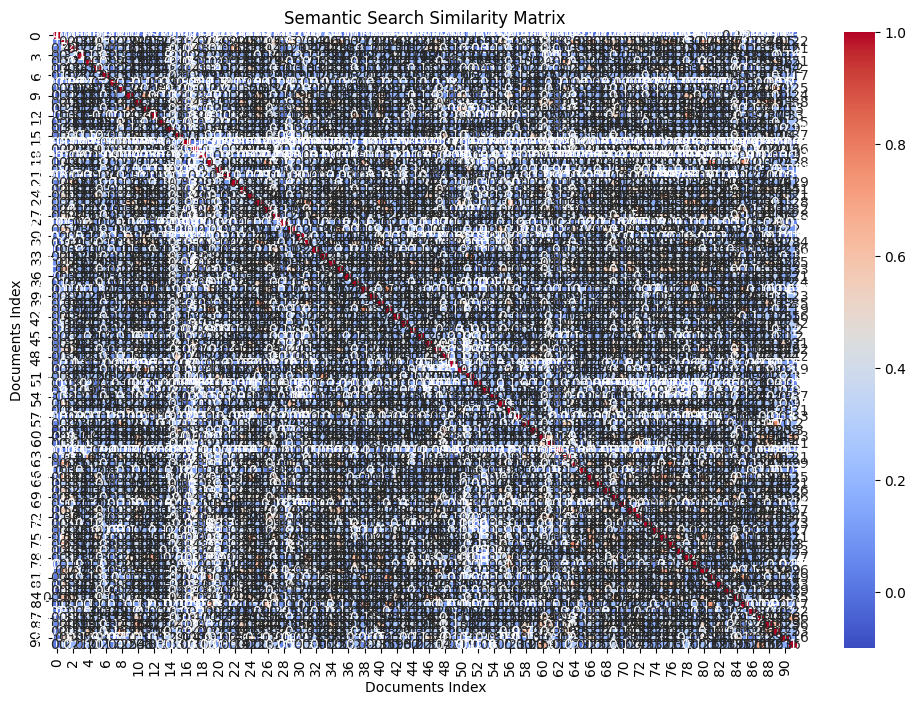

In [ ]:
#!/usr/bin/env python3
"""Q/A ChatBot module"""
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


def semantic_search(corpus_path, sentence):
    """
    performs semantic search on a corpus of documents
    corpus_path is the path to the corpus of reference documents on which
    to perform semantic search
    sentence is the sentence from which to perform semantic search
    Returns: the reference text of the document most similar to sentence
    """
    # include the query sentence in the documents list
    documents = [sentence]

    # read documents from the corpus path
    for filename in os.listdir(corpus_path):
        if filename.endswith(".md"):
            with open(os.path.join(corpus_path, filename), "r", encoding="utf-8") as f:
                documents.append(f.read())

    # load the semantic search model
    model = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

    # create embeddings for the documents
    embeddings = model(documents)

    # calculate the correlation matrix for the embeddings
    correlationMatrix = np.inner(embeddings, embeddings)

    # find the index of the document most similar to the input sentence
    closestDocIndex = np.argmax(correlationMatrix[0, 1:])

    # retrieve the reference text of the document most similar to input sentence
    mostSimilarDoc = documents[closestDocIndex + 1]

    return mostSimilarDoc, correlationMatrix, documents

# calling the semantic search function with a specific corpus and query
mostSimilarDoc, correlationMatrix, documents = semantic_search("/content/drive/MyDrive/ZendeskArticles", "When are PLDs?")

# print the most similar document found
print(mostSimilarDoc)

# visualizing the similarity matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title("Semantic Search Similarity Matrix")
plt.xlabel("Documents Index")
plt.ylabel("Documents Index")
plt.show()

#### ***task 4***

In [ ]:
#!/usr/bin/env python3
"""
answers questions from multiple reference texts
"""
import tensorflow as tf
import tensorflow_hub
from transformers import BertTokenizer


def question_answer(corpus_path):
    """
    reference is the reference text

    takes user input from CLI, initializes it as a question,
        formats it as lowercase with .lower(),
        strips any leading or trailing whitespace with .strip(),
        and checks to see if it is in the `exitWords` list
    If the question is in the `exitWords` list,
        responds with "Goodbye"
    If the question is not in the `exitWords` list,
        calls the `question_answer` function

    If the answer cannot be found in the reference text,
        responds with "Sorry, I do not understand your question."
    """
    ender = 1
    while ender == 1:
       # takes user input from CLI and identifies it as the question
        question = input("Q: ")
        exitWords = ["exit", "quit", "goodbye", "bye"]

        # process user input to account for character cases and whitespaces,
        #   then check if it is in the exitWords list
        if question.lower().strip() in exitWords:
            print("A: Goodbye")
            # if it is in the list, ender counter will go to zero, breaking the loop
            ender = 0
        else:
          reference = semantic_search(corpus_path, question)
          # if the user input was not an exit word, call question_answer function
          answer = answerFinder(question, reference)
          if answer is None:
              answer = "Sorry, I do not understand your question."
          # provide answer to user in CLI
          print("A: {}".format(answer))


def answerFinder(question, reference):
    """
    finds a snippet of text within a reference document to answer a question

    question is a string containing the question to answer
    reference is a string containing the reference document from which to find
        the answer

    Returns: a string containing the answer
    If no answer is found, return None
    If multiple answers are found, return the first one
    """
    # initialize a pre-trained BertTokenizer for tokenizing the input question and reference
    tokenizer = BertTokenizer.from_pretrained(
        'bert-large-uncased-whole-word-masking-finetuned-squad')

    # initialize the bert-uncased-tf2-qa model from the tensorflow-hub library
    model = tensorflow_hub.load("https://tfhub.dev/see--/bert-uncased-tf2-qa/1")

    # tokenize the question
    questionTokenized = tokenizer.tokenize(question)
    # tokenize the reference
    referenceTokenized = tokenizer.tokenize(reference)

    # Combine tokens with special tokens
    tokens = ['[CLS]'] + questionTokenized + ['[SEP]'] + referenceTokenized + ['[SEP]']

    # Convert tokens to IDs
    inputWord_IDs = tokenizer.convert_tokens_to_ids(tokens)

    # Create input mask
    inputMask = [1] * len(inputWord_IDs)

    # Create input type IDs
    segmentIDs = [0] * (1 + len(questionTokenized) + 1) + [1] * (len(referenceTokenized) + 1)

    # Prepare TensorFlow tensors
    inputWord_IDs = tf.expand_dims(tf.convert_to_tensor(inputWord_IDs, dtype=tf.int32), 0)
    inputMask = tf.expand_dims(tf.convert_to_tensor(inputMask, dtype=tf.int32), 0)
    segmentIDs = tf.expand_dims(tf.convert_to_tensor(segmentIDs, dtype=tf.int32), 0)

    # Get model outputs
    outputs = model([inputWord_IDs, inputMask, segmentIDs])

    # Find start and end of answer
    answerStart = tf.argmax(outputs[0][0][1:]) + 1
    answerEnd = tf.argmax(outputs[1][0][1:]) + 1

    # Extract answer tokens
    answerTokens = tokens[answerStart: answerEnd + 1]

    # Return answer string or None
    return tokenizer.convert_tokens_to_string(answerTokens) if answerTokens else None


import numpy as np
import os

def semantic_search(corpus_path, sentence):
    """
    performs semantic search on a corpus of documents

    corpus_path is the path to the corpus of reference documents on which
    to perform semantic search
    sentence is the sentence from which to perform semantic search

    Returns: the reference text of the document most similar to sentence
    """
    # include the query sentence in the documents list
    documents = [sentence]

    # read documents from the corpus path
    for filename in os.listdir(corpus_path):
        if filename.endswith(".md"):
            with open(os.path.join(corpus_path, filename), "r", encoding="utf-8") as f:
                documents.append(f.read())

    # load the semantic search model
    model = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

    # create embeddings for the documents
    embeddings = model(documents)

    # calculate the correlation matrix for the embeddings
    correlationMatrix = np.inner(embeddings, embeddings)

    # find the index of the document most similar to the input sentence
    closestDocIndex = np.argmax(correlationMatrix[0, 1:])

    # retrieve the reference text of the document most similar to input sentence
    mostSimilarDoc = documents[closestDocIndex + 1]

    return mostSimilarDoc

In [ ]:
question_answer('/content/drive/MyDrive/ZendeskArticles')

Q: When are PLDs?


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

KeyboardInterrupt: ignored